## Credit Card User Churn Prediction

### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

As a Data scientist at Thera bank the goal is to to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.

#### Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

#### Data Description

#### Data Dictionary:

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
3. Customer_Age: Age in Years
4. Gender: Gender of the account holder
5. Dependent_count: Number of dependents
6. Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
7. Marital_Status: Marital Status of the account holder
8. Income_Category: Annual Income Category of the account holder
9. Card_Category: Type of Card
10. Months_on_book: Period of relationship with the bank
11. Total_Relationship_Count: Total no. of products held by the customer
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months
13. Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
14. Credit_Limit: Credit Limit on the Credit Card
15. Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
16. Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
17. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
18. Total_Trans_Ct: Total Transaction Count (Last 12 months)
19. Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
20. Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
21. Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

##### Import necessary libraries

In [588]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from IPython.display import display, Markdown

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# To build a Random forest classifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import BaggingClassifier

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# To impute missing values
from sklearn.impute import KNNImputer

# To bin continuous data into intervals
from sklearn.preprocessing import KBinsDiscretizer

from xgboost import XGBClassifier, XGBRegressor

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [589]:
df = pd.read_csv("BankChurners.csv")

In [590]:
data = df.copy()

In [591]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [593]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [594]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                    0.0
Attrition_Flag               0.0
Customer_Age                 0.0
Gender                       0.0
Dependent_count              0.0
Education_Level             15.0
Marital_Status               7.4
Income_Category              0.0
Card_Category                0.0
Months_on_book               0.0
Total_Relationship_Count     0.0
Months_Inactive_12_mon       0.0
Contacts_Count_12_mon        0.0
Credit_Limit                 0.0
Total_Revolving_Bal          0.0
Avg_Open_To_Buy              0.0
Total_Amt_Chng_Q4_Q1         0.0
Total_Trans_Amt              0.0
Total_Trans_Ct               0.0
Total_Ct_Chng_Q4_Q1          0.0
Avg_Utilization_Ratio        0.0
dtype: float64

In [595]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [596]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(exclude=np.number).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


##### Set object datatypes as category

In [597]:
cat_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
# the other categorical variables have lots of levels
# and I wouldn't dummy encode them as such

for colname in cat_vars:
    data[colname] = data[colname].astype('category')

### Data Pre-Processing

In [598]:
# enrollee_id is unique for each candidate and might not add value to modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

### Outlier Treatment

In [599]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [600]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Customer_Age                0.019749
Dependent_count             0.000000
Months_on_book              3.811593
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      3.268490
Contacts_Count_12_mon       6.211119
Credit_Limit                9.716599
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             9.509233
Total_Amt_Chng_Q4_Q1        3.910339
Total_Trans_Amt             8.847635
Total_Trans_Ct              0.019749
Total_Ct_Chng_Q4_Q1         3.890590
Avg_Utilization_Ratio       0.000000
dtype: float64

- There are some outliers but

##### Replacing 'abc' category in Income_Category with np.nan

In [601]:
data["Income_Category"] = data["Income_Category"].replace("abc", np.nan)

## EDA

### Univariate Analysis

In [602]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


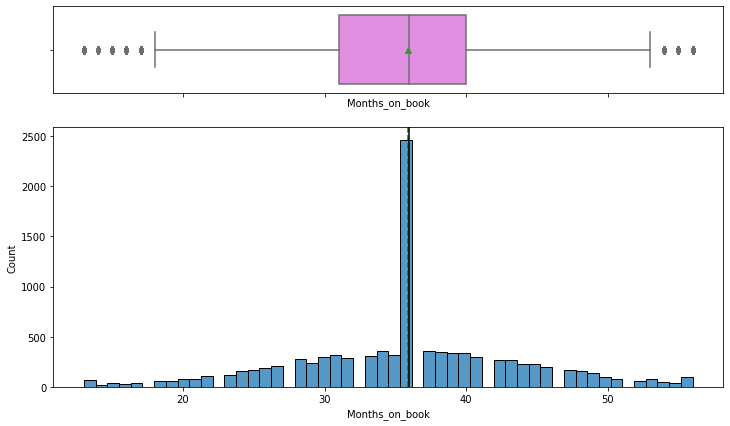

In [603]:
histogram_boxplot(data, 'Months_on_book')

- The Months_on_book data is normally distributed with some outliers.

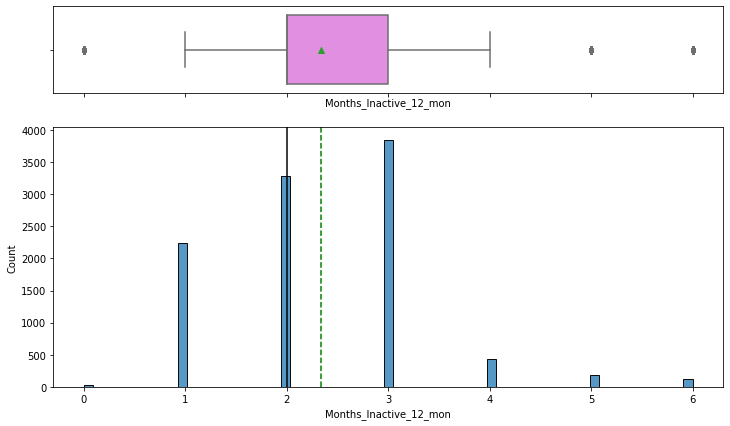

In [604]:
histogram_boxplot(data, 'Months_Inactive_12_mon')

- The values lie between 0-6 with mean value at 2.

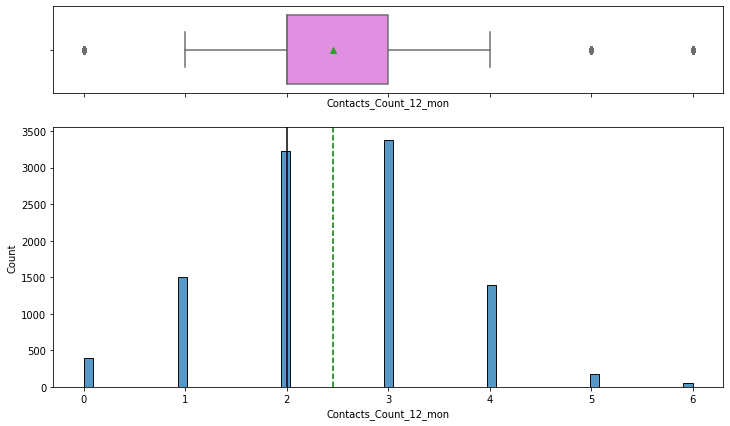

In [605]:
histogram_boxplot(data, 'Contacts_Count_12_mon')

- The values lie between 0-6 with mean value at 2.

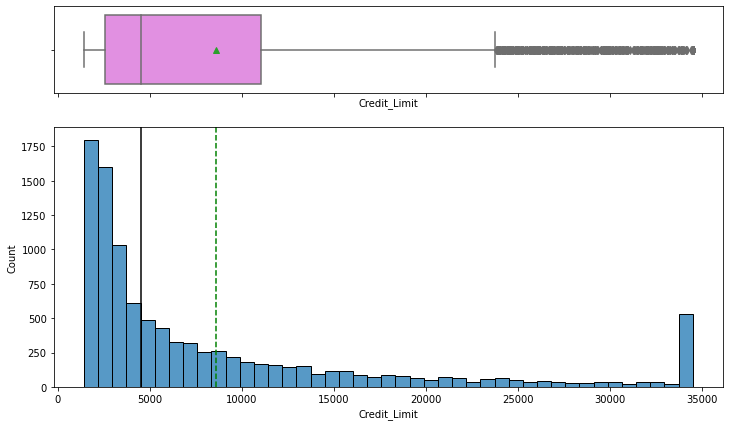

In [606]:
histogram_boxplot(data, 'Credit_Limit')

- The data is rightly skewed since mean is greater than median. There are also lots of outliers.

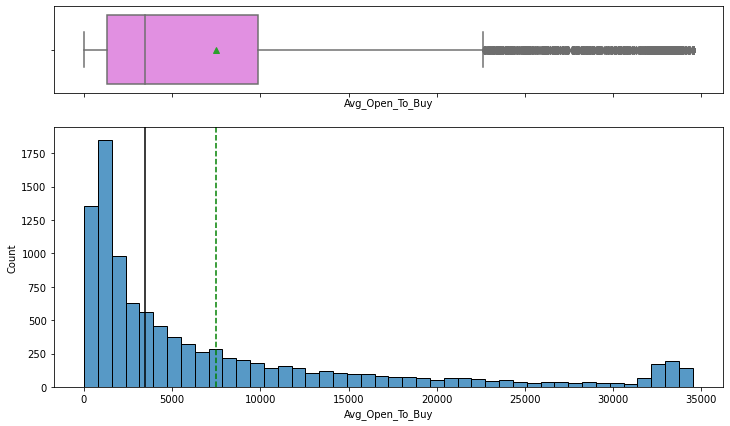

In [607]:
histogram_boxplot(data, 'Avg_Open_To_Buy')

- The data is rightly skewed since mean is greater than median. There are also lots of outliers.

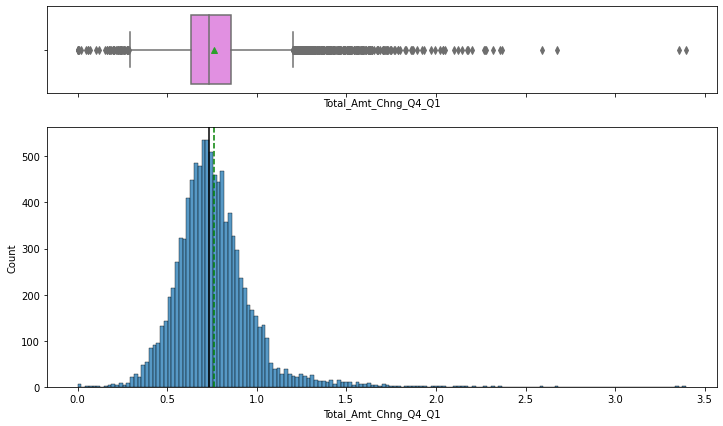

In [608]:
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1')

- The data is normally distributed with mean around .75.

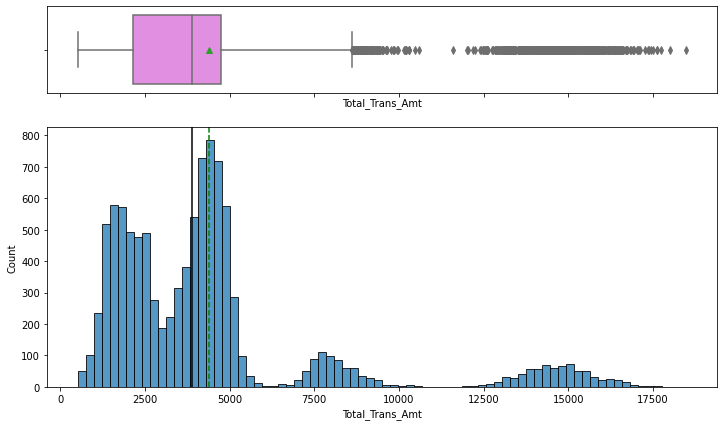

In [609]:
histogram_boxplot(data, 'Total_Trans_Amt')

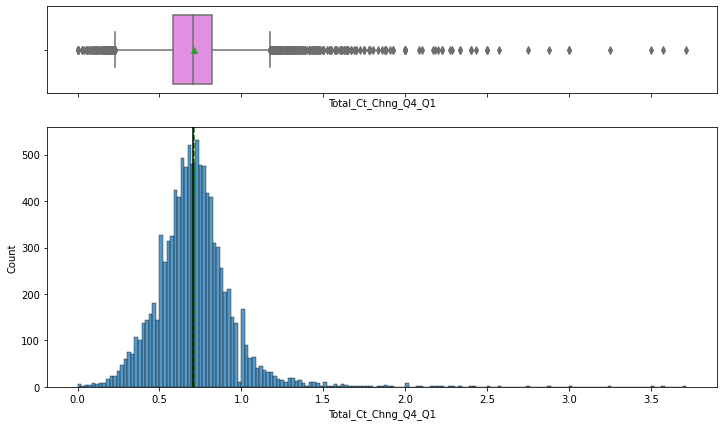

In [610]:
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1')

- The data is normally distributed with mean around 0.7.

In [611]:
cols_cat =data.columns
cols_cat

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [612]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

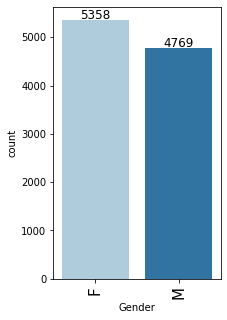

In [613]:
labeled_barplot(data, 'Gender')

- There are around 600 more female customers than male.

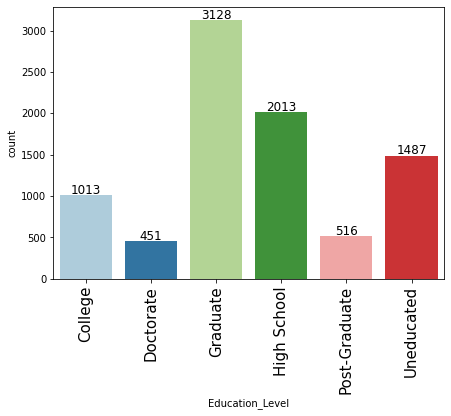

In [614]:
labeled_barplot(data, 'Education_Level')

- The most common education level among customers is 'Graduate'.

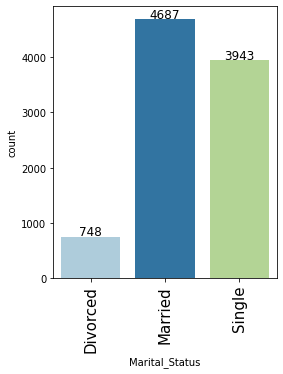

In [615]:
labeled_barplot(data, 'Marital_Status')

- There are more married customers than single.
- Around 750 customers are divorced.

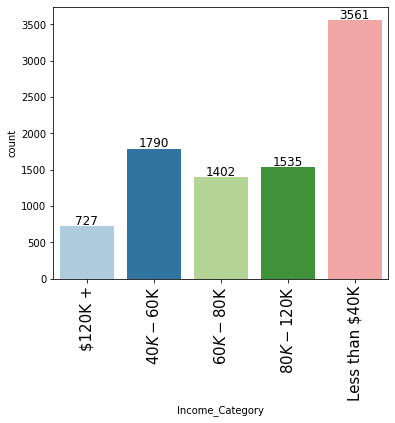

In [616]:
labeled_barplot(data, 'Income_Category')

- A big majority of the customers have income category 'Less than $40K'.

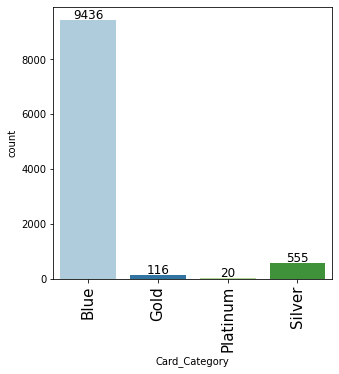

In [617]:
labeled_barplot(data, 'Card_Category')

- A very big majority of the customers have card category 'Blue'.

In [618]:
data["Attrition_Flag"].replace("Attrited Customer",1, inplace=True)
data["Attrition_Flag"].replace("Existing Customer",0, inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Bivariate Analysis

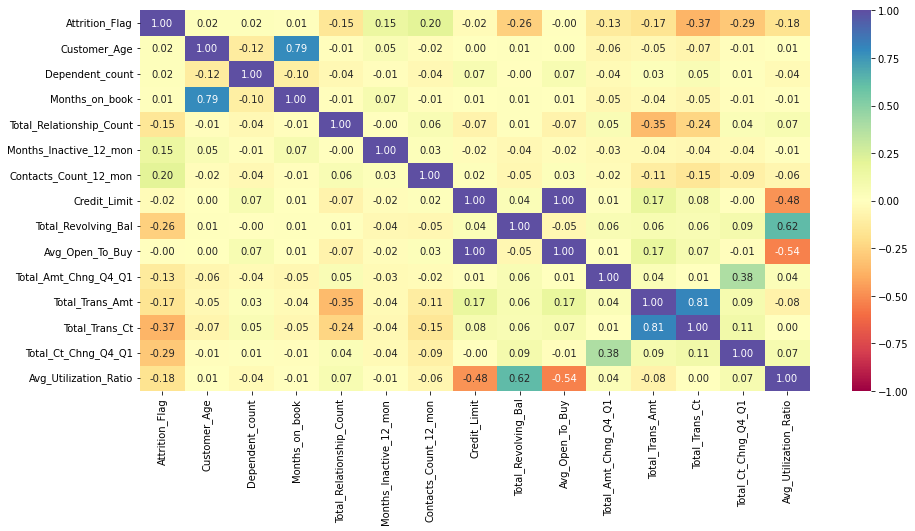

In [619]:
corr_cols = ['Attrition_Flag','Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- 'Months_on_book' is highly correlated to the 'Customers_Age' so we can drop it.
- 'Avg_Open_To_Buy' is highly correlated to 'Credit_Limit' so we can drop it.
- Credit_Limit is negatively correlated with Avg_Utilization_Ratio which is expected.
- Total_Revolving_Bal and Avg_Utilization_Ratio are positively correlated.
- The target variable is negatively correlated to variables like Total_Ct_Chng_Q4_Q1, Total_Revolving_Balance and Total_Trans_Ct.

In [620]:
data.drop('Months_on_book', axis=1, inplace=True)
data.drop('Avg_Open_To_Buy', axis=1, inplace=True)

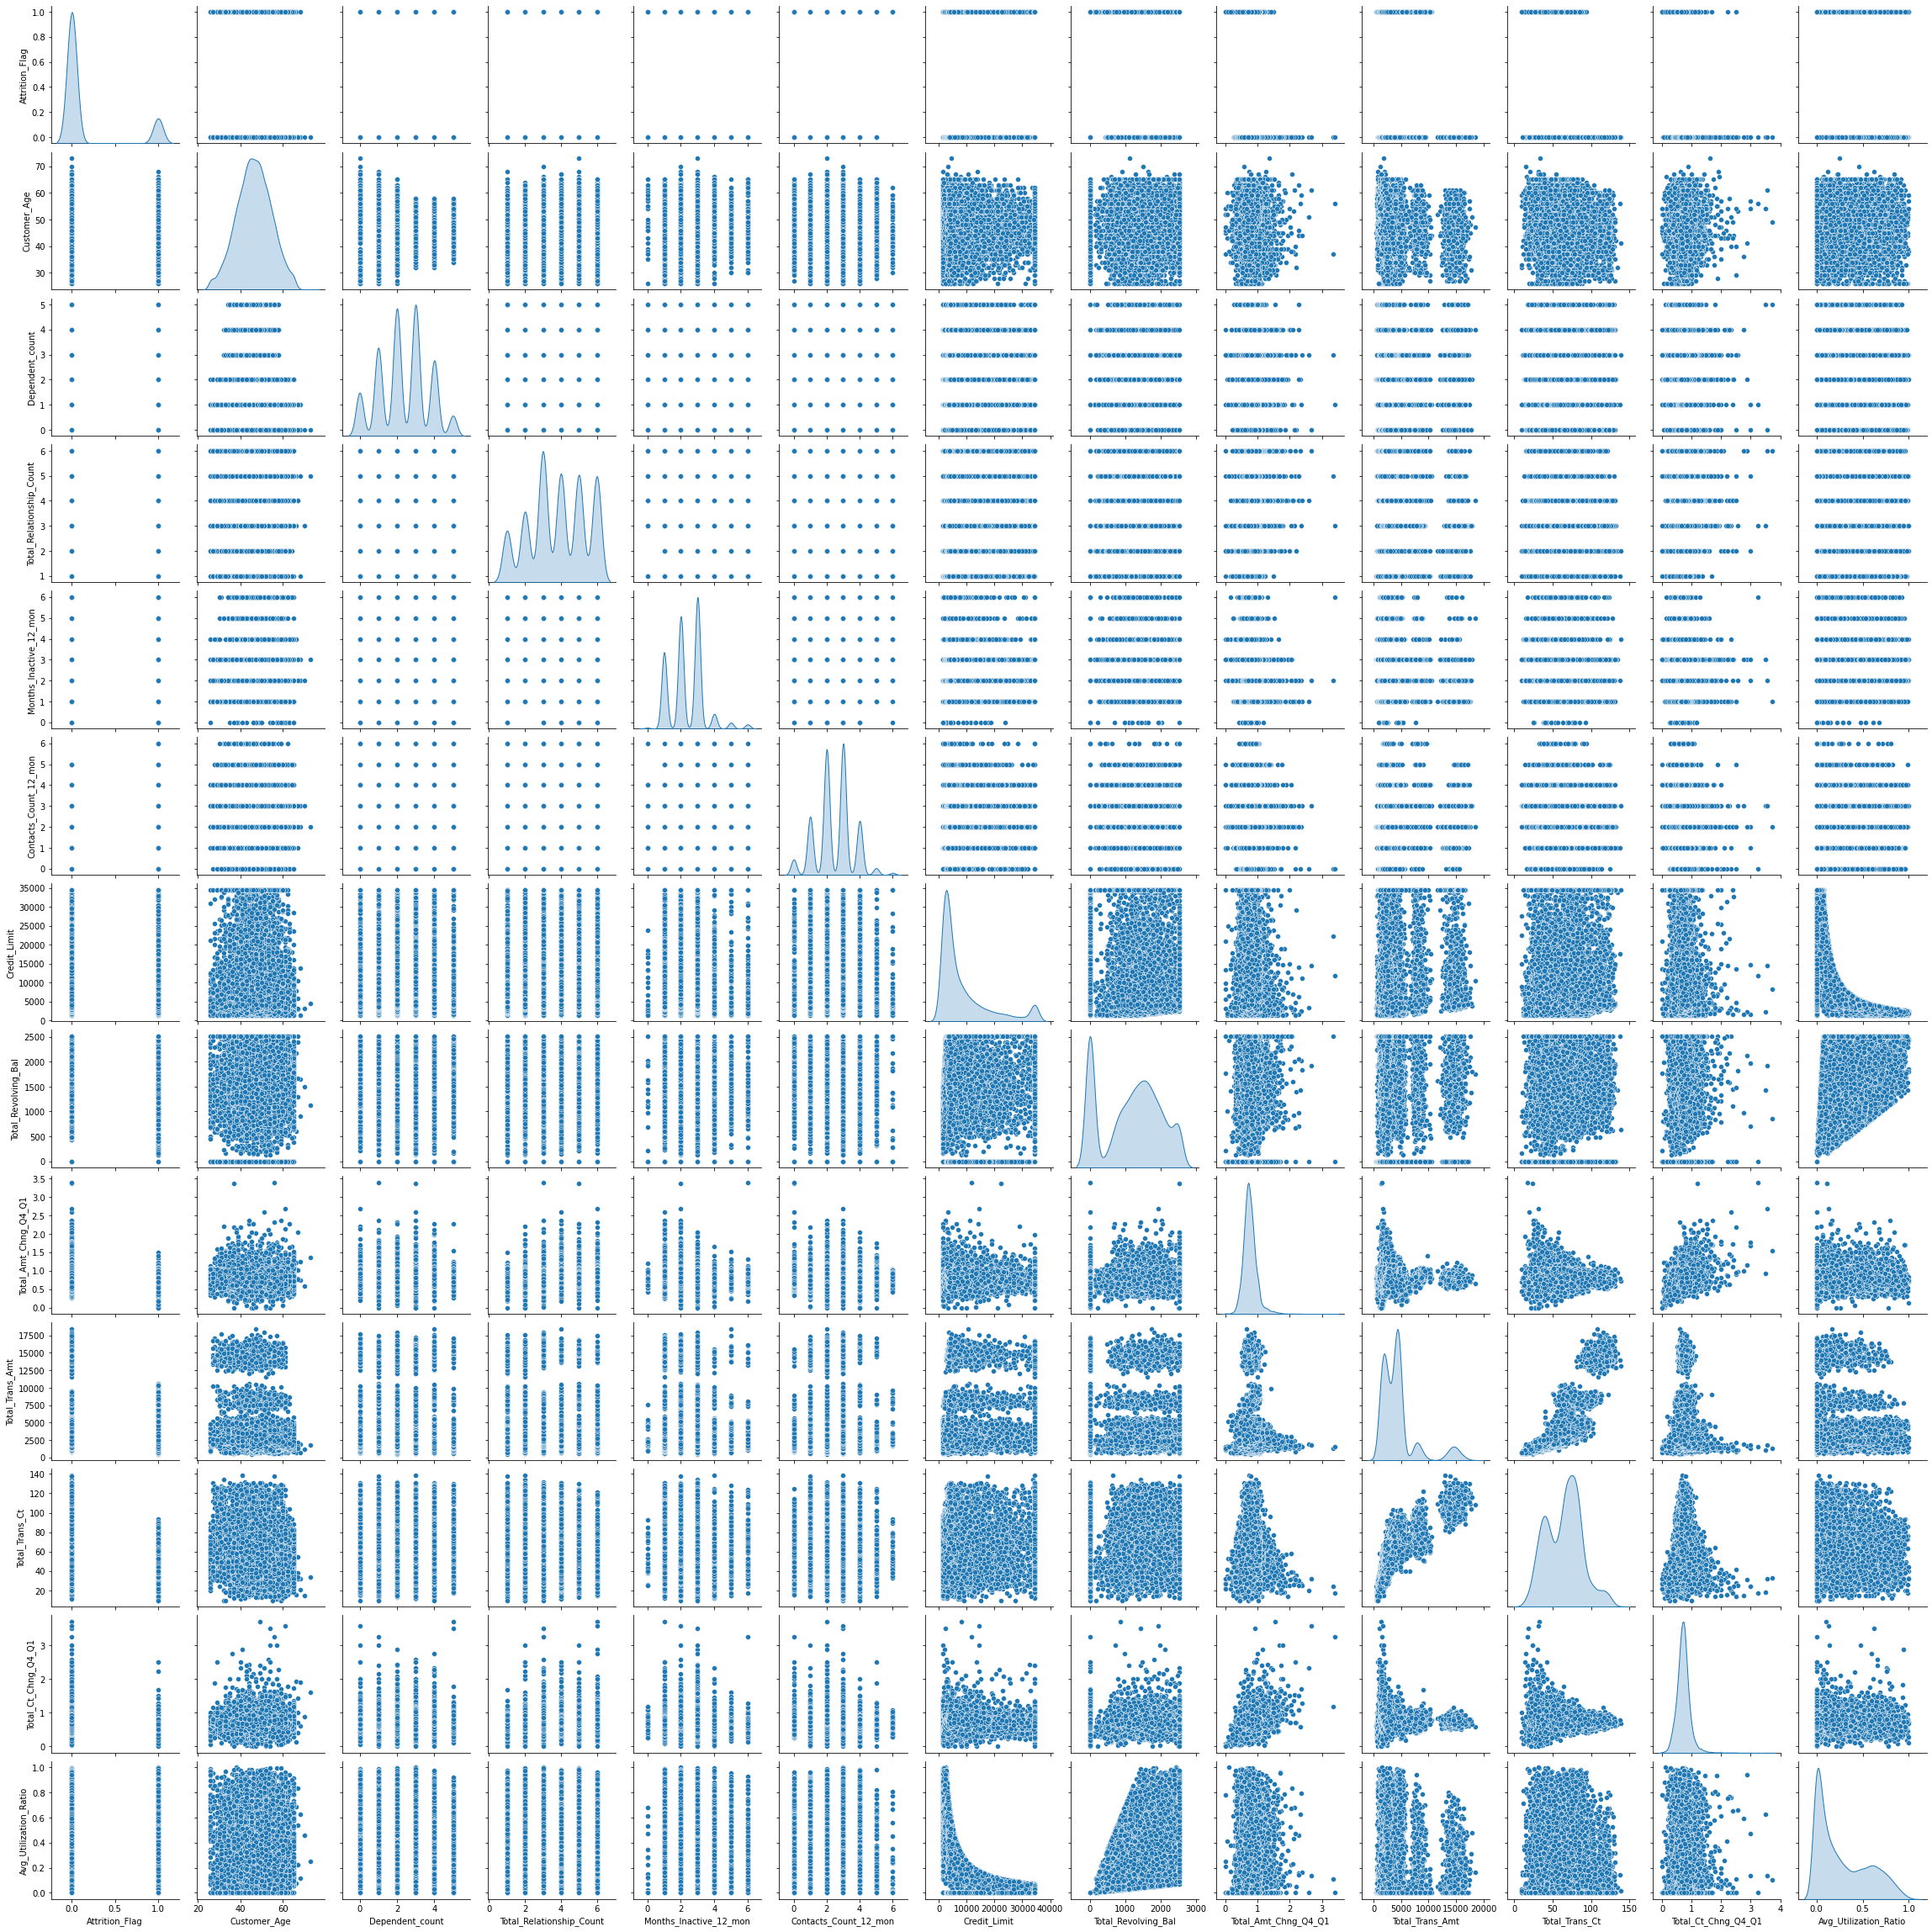

In [621]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

In [622]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [623]:
data["Attrition_Flag"].replace(1, "Attrited Customer", inplace=True)
data["Attrition_Flag"].replace(0, "Existing Customer", inplace=True)

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


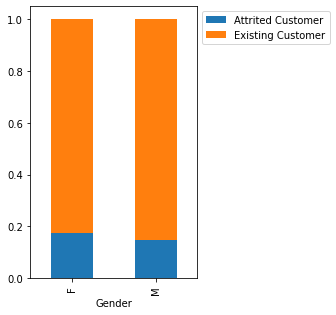

In [624]:
stacked_barplot(data, 'Gender', "Attrition_Flag")

- The number of customers churn are equal in both genders.

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


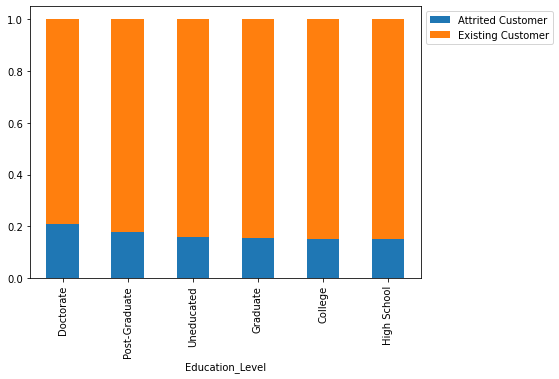

In [625]:
stacked_barplot(data, 'Education_Level', "Attrition_Flag")

- The number of customers churn are higher with higher education level.

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


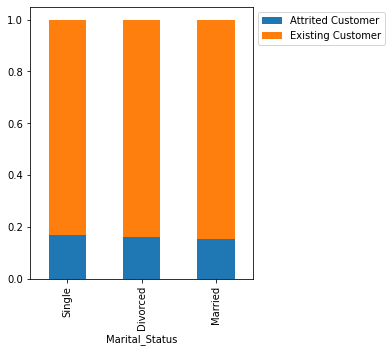

In [626]:
stacked_barplot(data, 'Marital_Status', "Attrition_Flag")

- The marital status doesn't have much impact if the customer will churn.

Attrition_Flag   Attrited Customer  Existing Customer   All
Income_Category                                            
All                           1440               7575  9015
Less than $40K                 612               2949  3561
$40K - $60K                    271               1519  1790
$80K - $120K                   242               1293  1535
$60K - $80K                    189               1213  1402
$120K +                        126                601   727
------------------------------------------------------------------------------------------------------------------------


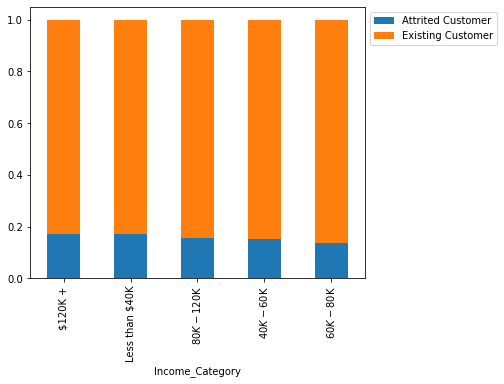

In [627]:
stacked_barplot(data, 'Income_Category', "Attrition_Flag")

- The customers with income less than 40k or more than 120k have a higher churn rate.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


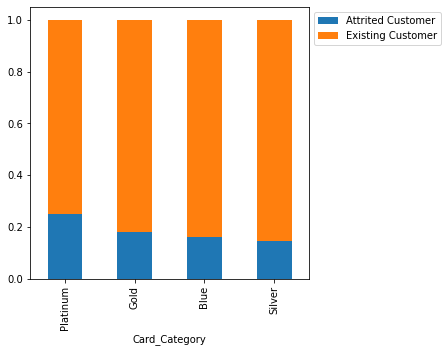

In [628]:
stacked_barplot(data, 'Card_Category', "Attrition_Flag")

- The customers holding Platinum card have a higher chance of churning followed by Gold.

Attrition_Flag  Attrited Customer  Existing Customer    All
Customer_Age                                               
All                          1627               8500  10127
43                             85                388    473
48                             85                387    472
44                             84                416    500
46                             82                408    490
45                             79                407    486
49                             79                416    495
47                             76                403    479
41                             76                303    379
50                             71                381    452
54                             69                238    307
40                             64                297    361
42                             62                364    426
53                             59                328    387
52                             58       

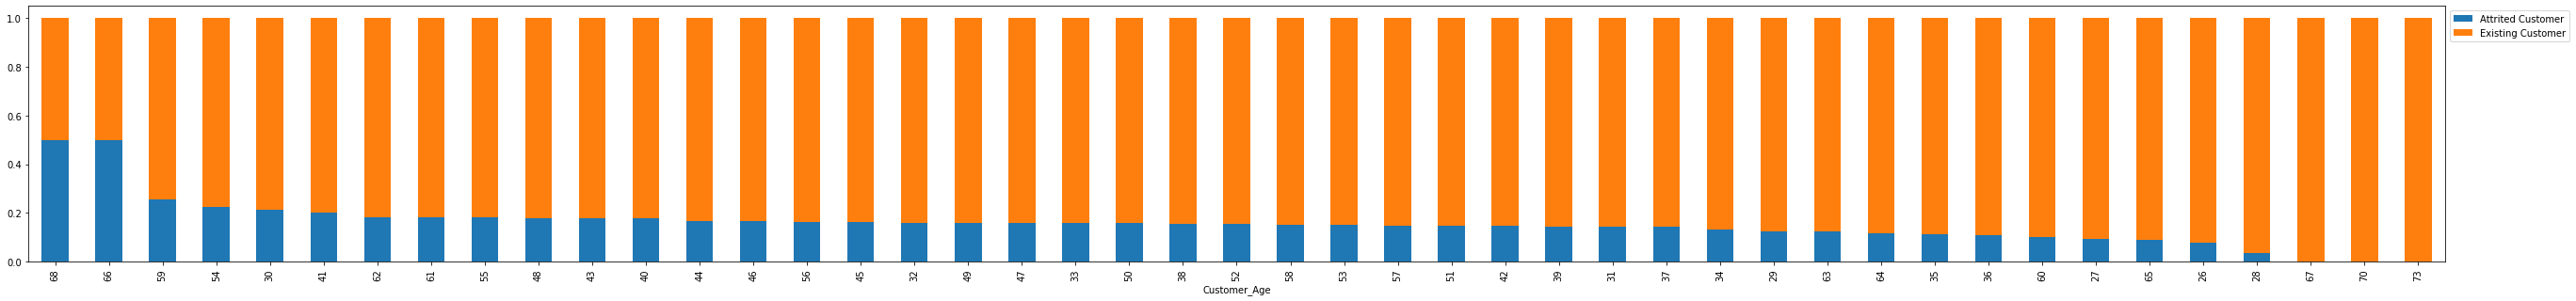

In [629]:
stacked_barplot(data, 'Customer_Age', "Attrition_Flag")

- The older customers have less chance to churn.

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


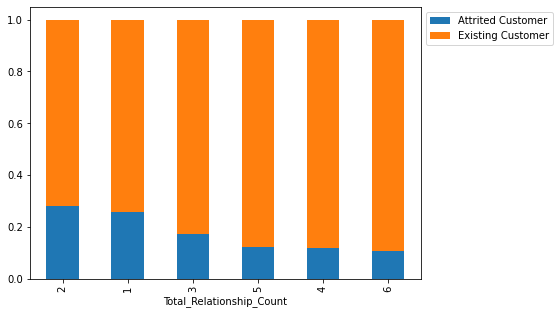

In [630]:
stacked_barplot(data, 'Total_Relationship_Count', "Attrition_Flag")

- The customers holding less number of Bank products have a higher chance to churn.

#### Variable Transformations

- The features like Credit_Limit, Avg_Open_To_Buy and Total_Trans_Amt look skewed. We can apply log transformation to make it more uniformly distributed.

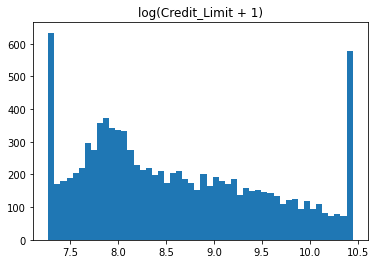

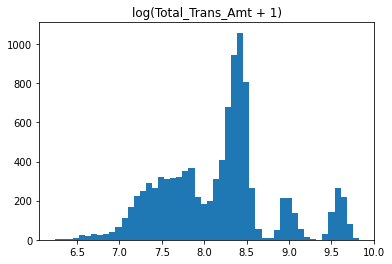

In [631]:
plt.hist(np.log(data['Credit_Limit'] + 1), 50)
plt.title('log(Credit_Limit + 1)')
plt.show()
plt.hist(np.log(data['Total_Trans_Amt'] + 1), 50)
plt.title('log(Total_Trans_Amt + 1)')
plt.show()

In [632]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [633]:
cols_to_log = ['Credit_Limit','Total_Trans_Amt']
for colname in cols_to_log:
    data[colname + '_log'] = np.log(data[colname] + 1)
    data.drop(colname, axis=1, inplace=True)

In [634]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Total_Trans_Amt_log
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,42,1.625,0.061,9.448727,7.043160
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,864,1.541,33,3.714,0.105,9.018817,7.163947
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,0,2.594,20,2.333,0.000,8.137103,7.543273
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,3,4,1,2517,1.405,20,2.333,0.760,8.105911,7.066467
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,0,2.175,28,2.500,0.000,8.458928,6.705639


### Feature Engineering

#### Missing-Value Treatment

In [635]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Credit_Limit_log               0
Total_Trans_Amt_log            0
dtype: int64

In [636]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = ['Education_Level', 'Marital_Status','Income_Category']

data[reqd_col_for_impute].head()

,Education_Level,Marital_Status,Income_Category
0,High School,Married,$60K - $80K
1,Graduate,Single,Less than $40K
2,Graduate,Married,$80K - $120K
3,High School,NaN,Less than $40K
4,Uneducated,Married,$60K - $80K


In [637]:
for col in reqd_col_for_impute:
    print(data[col].value_counts())

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64


In [638]:
data1 = data.copy()

### Data Preparation for Modelling

In [639]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [640]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6480, 17) (1621, 17) (2026, 17)


In [641]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6480
Number of rows in validation data = 1621
Number of rows in test data = 2026


In [642]:
# Discretize variable into 3 equal-sized buckets based on quantiles
bins_transform = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")

cols_target = ['Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']

for col in cols_target:
    # Fit and transform the train data
    X_train[col] = bins_transform.fit_transform(
        np.array(X_train[col]).reshape(-1, 1)
        )  ## Converting it to numpy array and reshaping because the method expects a 2D array.

    # Transform the val data
    X_val[col] = bins_transform.transform(
        np.array(X_val[col]).reshape(-1, 1)
    )
    # Transform the test data
    X_test[col] = bins_transform.transform(
        np.array(X_test[col]).reshape(-1, 1)
    )

In [643]:
## Adding labels to the city and map it to the train, val and test set
labels = {0: "Low", 1: "Medium", 2: "High"}

for col in cols_target:
    X_train[col] = X_train[col].map(labels)
    X_val[col] = X_val[col].map(labels)
    X_test[col] = X_test[col].map(labels)

In [644]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Total_Trans_Amt_log
165,51,F,3,Uneducated,Married,Less than $40K,Blue,3,1,2,1761,Medium,30,Low,High,7.689829,7.406103
6418,47,F,3,College,Married,Less than $40K,Blue,6,3,2,0,Medium,35,Medium,Low,7.485492,7.694848
8492,46,F,1,Uneducated,NaN,NaN,Blue,5,2,6,0,Low,55,Medium,Low,7.635304,7.921173
4220,50,M,1,High School,Single,$120K +,Blue,4,1,4,1792,Low,60,Medium,Medium,9.185945,8.327243
7217,52,M,2,NaN,Married,Less than $40K,Blue,3,3,3,1606,Medium,86,High,High,7.954021,8.535622


In [645]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Fit and transform the train data 
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute]) 

# Transform the validation data 
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute]) 

# Transform the test data 
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [646]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Total_Trans_Amt_log
165,51,F,3,Uneducated,Married,Less than $40K,Blue,3,1,2,1761,Medium,30,Low,High,7.689829,7.406103
6418,47,F,3,College,Married,Less than $40K,Blue,6,3,2,0,Medium,35,Medium,Low,7.485492,7.694848
8492,46,F,1,Uneducated,Married,Less than $40K,Blue,5,2,6,0,Low,55,Medium,Low,7.635304,7.921173
4220,50,M,1,High School,Single,$120K +,Blue,4,1,4,1792,Low,60,Medium,Medium,9.185945,8.327243
7217,52,M,2,Graduate,Married,Less than $40K,Blue,3,3,3,1606,Medium,86,High,High,7.954021,8.535622


In [647]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Credit_Limit_log            0
Total_Trans_Amt_log         0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio     

### Creating Dummy Variables

In [648]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6480, 30) (1621, 30) (2026, 30)


## Building the model

### Model evaluation criterion:

##### Model can make wrong predictions as:

1. Predicting a customer is going to churn but in reality, the customer is not going to churn - Loss of resources
2. Predicting a customer is not going to churn but in reality the customer is going to churn - Loss of opportunity

#### Which case is more important?

- Predicting a customer is not going to churn but in reality the customer is going to churn i.e. losing on a potential opportunity as the customer will not be targeted by the Bank when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?

- Bank would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [649]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [650]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [651]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Logistic Regression

In [652]:
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train, y_train)

C:\Users\atifh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1)

In [653]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.902469,0.564841,0.766623,0.650442


In [654]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.920419,0.643678,0.823529,0.722581


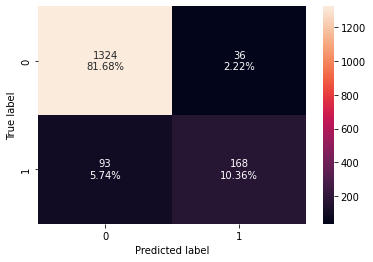

In [655]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

### Decision Tree Model

In [656]:
dt_estimator = DecisionTreeClassifier(criterion="gini", random_state=1)
dt_estimator.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [657]:
# Calculating different metrics on train set
dt_estimator_train_perf = model_performance_classification_sklearn(
    dt_estimator, X_train, y_train
)
print("Training performance:")
dt_estimator_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [658]:
# Calculating different metrics on validation set
dt_estimator_val_perf = model_performance_classification_sklearn(dt_estimator, X_val, y_val)
print("Validation performance:")
dt_estimator_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.927822,0.781609,0.772727,0.777143


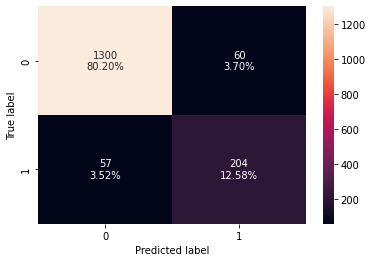

In [659]:
confusion_matrix_sklearn(dt_estimator, X_val, y_val)

### Bagging Classifier

In [660]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [661]:
# Calculating different metrics on train set
bagging_estimator_train_perf = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
print("Training performance:")
bagging_estimator_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996451,0.980788,0.99707,0.988862


In [662]:
# Calculating different metrics on validation set
bagging_estimator_val_perf = model_performance_classification_sklearn(bagging_estimator, X_val, y_val)
print("Validation performance:")
bagging_estimator_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.951882,0.789272,0.899563,0.840816


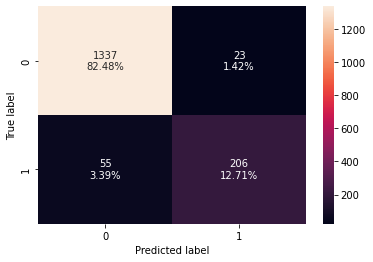

In [663]:
confusion_matrix_sklearn(bagging_estimator, X_val, y_val)

### AdaBoost

In [664]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [665]:
# Calculating different metrics on train set
ab_classifier_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance:")
ab_classifier_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.956173,0.833814,0.886619,0.859406


In [666]:
# Calculating different metrics on validation set
ab_classifier_val_perf = model_performance_classification_sklearn(ab_classifier, X_val, y_val)
print("Validation performance:")
ab_classifier_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.955583,0.835249,0.882591,0.858268


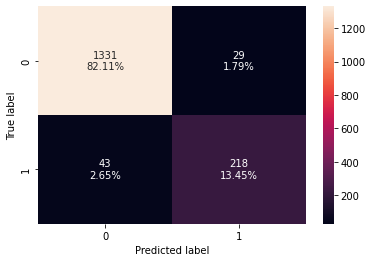

In [667]:
confusion_matrix_sklearn(ab_classifier, X_val, y_val)

### Gradient Boosting

In [668]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [669]:
# Calculating different metrics on train set
gb_classifier_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:")
gb_classifier_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.968827,0.85975,0.941115,0.898594


In [670]:
# Calculating different metrics on validation set
gb_classifier_val_perf = model_performance_classification_sklearn(gb_classifier, X_val, y_val)
print("Validation performance:")
gb_classifier_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.960518,0.835249,0.912134,0.872


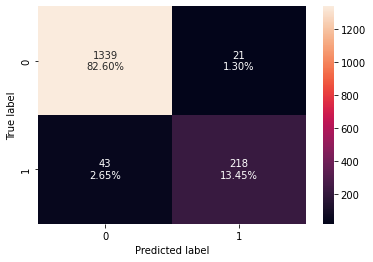

In [671]:
confusion_matrix_sklearn(gb_classifier, X_val, y_val)

### XGBoost

In [672]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [673]:
# Calculating different metrics on train set
xgb_classifier_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:")
xgb_classifier_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [674]:
# Calculating different metrics on validation set
xgb_classifier_val_perf = model_performance_classification_sklearn(xgb_classifier, X_val, y_val)
print("Validation performance:")
xgb_classifier_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.967304,0.869732,0.922764,0.895464


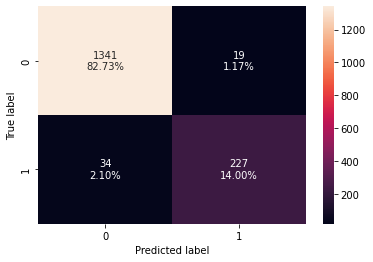

In [675]:
confusion_matrix_sklearn(xgb_classifier, X_val, y_val)

### Oversampling train data using SMOTE

In [676]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1041
Before Oversampling, counts of label 'No': 5439 

After Oversampling, counts of label 'Yes': 5439
After Oversampling, counts of label 'No': 5439 

After Oversampling, the shape of train_X: (10878, 30)
After Oversampling, the shape of train_y: (10878,) 



### Logistic Regression on oversampled data

In [677]:
log_reg_over = LogisticRegression(random_state=1, max_iter=1000)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

C:\Users\atifh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1)

In [678]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.916529,0.911013,0.921175,0.916066


In [679]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.895126,0.712644,0.661922,0.686347


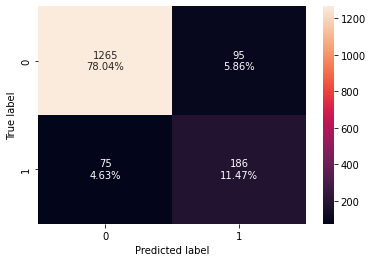

In [680]:
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

### Decision Tree on Oversampled data

In [681]:
dt_estimator_over = DecisionTreeClassifier(criterion="gini", random_state=1)
dt_estimator_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

In [682]:
# Calculating different metrics on train set
dt_estimator_over_train_perf = model_performance_classification_sklearn(
    dt_estimator_over, X_train_over, y_train_over
)
print("Training performance:")
dt_estimator_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [683]:
# Calculating different metrics on validation set
dt_estimator_over_val_perf = model_performance_classification_sklearn(dt_estimator_over, X_val, y_val)
print("Validation performance:")
dt_estimator_over_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.916718,0.831418,0.704545,0.762742


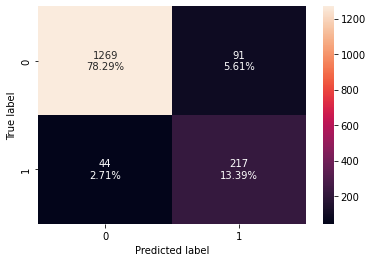

In [684]:
confusion_matrix_sklearn(dt_estimator_over, X_val, y_val)

### Bagging Classifier on Oversampled data

In [685]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator_over=BaggingClassifier(random_state=1)
bagging_estimator_over.fit(X_train_over,y_train_over)

BaggingClassifier(random_state=1)

In [686]:
# Calculating different metrics on train set
bagging_estimator_over_train_perf = model_performance_classification_sklearn(
    bagging_estimator_over, X_train_over, y_train_over
)
print("Training performance:")
bagging_estimator_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.997702,0.99761,0.997793,0.997702


In [687]:
# Calculating different metrics on validation set
bagging_estimator_over_val_perf = model_performance_classification_sklearn(bagging_estimator_over, X_val, y_val)
print("Validation performance:")
bagging_estimator_over_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.932141,0.831418,0.766784,0.797794


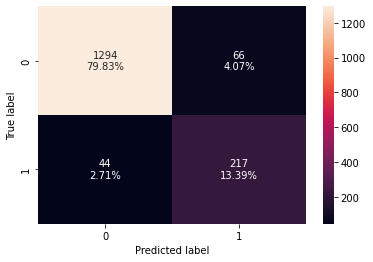

In [688]:
confusion_matrix_sklearn(bagging_estimator_over, X_val, y_val)

### AdaBoost on Oversampled data

In [689]:
ab_classifier_over=AdaBoostClassifier(random_state=1)
ab_classifier_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(random_state=1)

In [690]:
# Calculating different metrics on train set
ab_classifier_over_train_perf = model_performance_classification_sklearn(
    ab_classifier_over, X_train_over, y_train_over
)
print("Training performance:")
ab_classifier_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.955507,0.957897,0.953339,0.955613


In [691]:
# Calculating different metrics on validation set
ab_classifier_over_val_perf = model_performance_classification_sklearn(ab_classifier_over, X_val, y_val)
print("Validation performance:")
ab_classifier_over_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.935225,0.854406,0.768966,0.809437


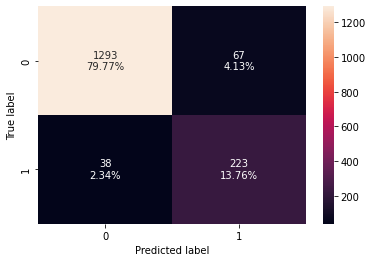

In [692]:
confusion_matrix_sklearn(ab_classifier_over, X_val, y_val)

### Gradient Boosting on Oversampled data

In [693]:
#Fitting the model
gb_classifier_over = GradientBoostingClassifier(random_state=1)
gb_classifier_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier(random_state=1)

In [694]:
# Calculating different metrics on train set
gb_classifier_over_train_perf = model_performance_classification_sklearn(
    gb_classifier_over, X_train_over, y_train_over
)
print("Training performance:")
gb_classifier_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.96709,0.968009,0.966232,0.96712


In [695]:
# Calculating different metrics on validation set
gb_classifier_over_val_perf = model_performance_classification_sklearn(gb_classifier_over, X_val, y_val)
print("Validation performance:")
gb_classifier_over_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.942628,0.862069,0.797872,0.828729


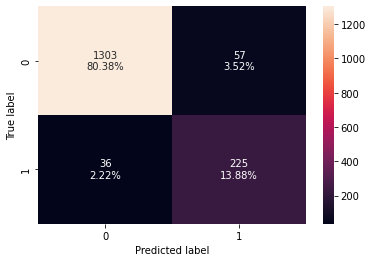

In [696]:
confusion_matrix_sklearn(gb_classifier_over, X_val, y_val)

### XGBoost on Oversampled data

In [697]:
#Fitting the model
xgb_classifier_over = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier_over.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [698]:
# Calculating different metrics on train set
xgb_classifier_over_train_perf = model_performance_classification_sklearn(
    xgb_classifier_over, X_train_over, y_train_over
)
print("Training performance:")
xgb_classifier_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999908,1.0,0.999816,0.999908


In [699]:
# Calculating different metrics on validation set
xgb_classifier_over_val_perf = model_performance_classification_sklearn(xgb_classifier_over, X_val, y_val)
print("Validation performance:")
xgb_classifier_over_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.957434,0.877395,0.860902,0.86907


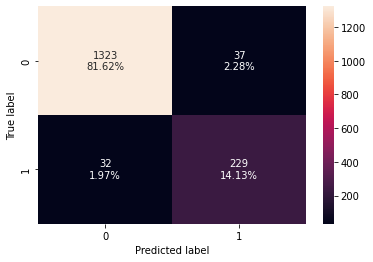

In [700]:
confusion_matrix_sklearn(xgb_classifier_over, X_val, y_val)

### Undersampling train data using Random Under Sampler

In [701]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [702]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 1041
Before Undersampling, counts of label 'No': 5439 

After Undersampling, counts of label 'Yes': 1041
After Undersampling, counts of label 'No': 1041 

After Undersampling, the shape of train_X: (2082, 30)
After Undersampling, the shape of train_y: (2082,) 



### Logistic Regression on undersampled data

In [703]:
log_reg_under = LogisticRegression(random_state=1, max_iter=1000)
log_reg_under.fit(X_train_un, y_train_un)

C:\Users\atifh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1)

In [704]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.836215,0.842459,0.832068,0.837232


In [705]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.84454,0.885057,0.509934,0.647059


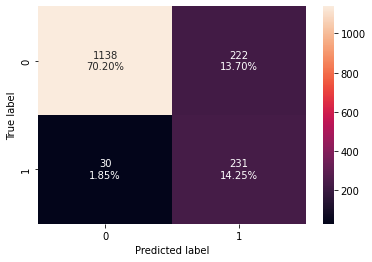

In [706]:
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

### Decision Tree on undersampled data

In [707]:
dt_estimator_un = DecisionTreeClassifier(criterion="gini", random_state=1)
dt_estimator_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

In [708]:
# Calculating different metrics on train set
dt_estimator_un_train_perf = model_performance_classification_sklearn(
    dt_estimator_un, X_train_un, y_train_un
)
print("Training performance:")
dt_estimator_un_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [709]:
# Calculating different metrics on validation set
dt_estimator_un_val_perf = model_performance_classification_sklearn(dt_estimator_un, X_val, y_val)
print("Validation performance:")
dt_estimator_un_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.908081,0.927203,0.650538,0.764613


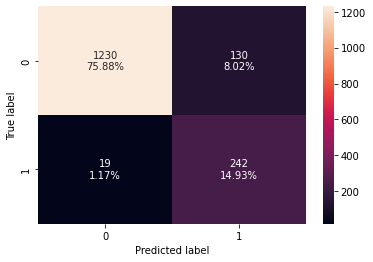

In [710]:
confusion_matrix_sklearn(dt_estimator_un, X_val, y_val)

### Bagging Classifier on undersampled data

In [711]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator_un=BaggingClassifier(random_state=1)
bagging_estimator_un.fit(X_train_un,y_train_un)

BaggingClassifier(random_state=1)

In [712]:
# Calculating different metrics on train set
bagging_estimator_un_train_perf = model_performance_classification_sklearn(
    bagging_estimator_un, X_train_un, y_train_un
)
print("Training performance:")
bagging_estimator_un_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994717,0.991354,0.998066,0.994699


In [713]:
# Calculating different metrics on validation set
bagging_estimator_un_val_perf = model_performance_classification_sklearn(bagging_estimator_un, X_val, y_val)
print("Validation performance:")
bagging_estimator_un_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.927205,0.931034,0.708455,0.804636


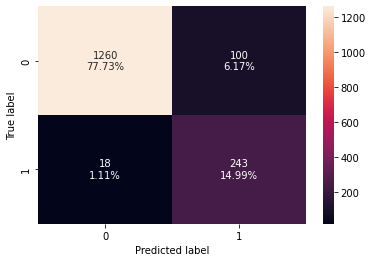

In [714]:
confusion_matrix_sklearn(bagging_estimator_un, X_val, y_val)

### AdaBoost on undersampled data

In [715]:
ab_classifier_un=AdaBoostClassifier(random_state=1)
ab_classifier_un.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

In [716]:
# Calculating different metrics on train set
ab_classifier_un_train_perf = model_performance_classification_sklearn(
    ab_classifier_un, X_train_un, y_train_un
)
print("Training performance:")
ab_classifier_un_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.93804,0.941402,0.935115,0.938248


In [717]:
# Calculating different metrics on validation set
ab_classifier_un_val_perf = model_performance_classification_sklearn(ab_classifier_un, X_val, y_val)
print("Validation performance:")
ab_classifier_un_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.916101,0.942529,0.6703,0.783439


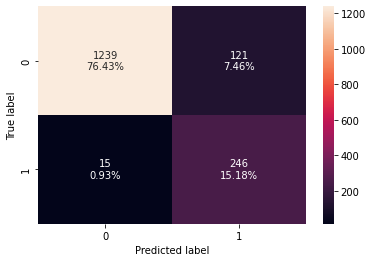

In [718]:
confusion_matrix_sklearn(ab_classifier_un, X_val, y_val)

### Gradient Boosting with undersampled data

In [719]:
#Fitting the model
gb_classifier_un = GradientBoostingClassifier(random_state=1)
gb_classifier_un.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=1)

In [720]:
# Calculating different metrics on train set
gb_classifier_un_train_perf = model_performance_classification_sklearn(
    gb_classifier_un, X_train_un, y_train_un
)
print("Training performance:")
gb_classifier_un_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.976465,0.982709,0.970588,0.976611


In [721]:
# Calculating different metrics on validation set
gb_classifier_un_val_perf = model_performance_classification_sklearn(gb_classifier_un, X_val, y_val)
print("Validation performance:")
gb_classifier_un_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.932758,0.950192,0.72093,0.819835


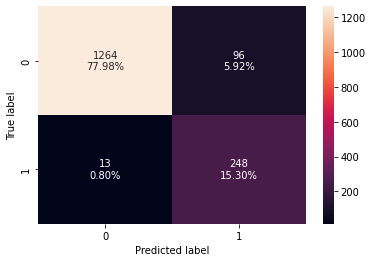

In [722]:
confusion_matrix_sklearn(gb_classifier_un, X_val, y_val)

### XGBoost with undersampled data

In [723]:
#Fitting the model
xgb_classifier_un = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier_un.fit(X_train_un,y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [724]:
# Calculating different metrics on train set
xgb_classifier_un_train_perf = model_performance_classification_sklearn(
    xgb_classifier_un, X_train_un, y_train_un
)
print("Training performance:")
xgb_classifier_un_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [725]:
# Calculating different metrics on validation set
xgb_classifier_un_val_perf = model_performance_classification_sklearn(xgb_classifier_un, X_val, y_val)
print("Validation performance:")
xgb_classifier_un_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.942628,0.954023,0.754545,0.84264


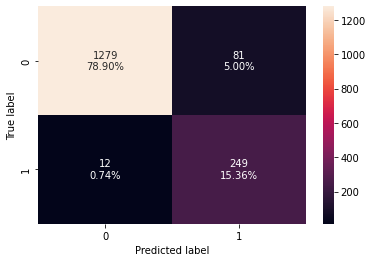

In [726]:
confusion_matrix_sklearn(xgb_classifier_un, X_val, y_val)

### Comparing all the Models

In [727]:
# defining list of models
models = [lr,dt_estimator,bagging_estimator,ab_classifier,gb_classifier,xgb_classifier,
         log_reg_over,dt_estimator_over,bagging_estimator_over,ab_classifier_over,gb_classifier_over,xgb_classifier_over,
         log_reg_under,dt_estimator_un,bagging_estimator_un,ab_classifier_un,gb_classifier_un,xgb_classifier_un]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [728]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Decision Tree Classifier','Bagging Classifier',
                                        'AdaBoost Classifer', 'Gradient Boosting Classifier',
                                         'XGBoost Classifier','Logistic Regression-OVER','Decision Tree Classifier-OVER','Bagging Classifier-OVER',
                                        'AdaBoost Classifer-OVER', 'Gradient Boosting Classifier-OVER',
                                         'XGBoost Classifier-OVER', 'Logistic Regression-UNDER','Decision Tree Classifier-UNDER','Bagging Classifier-UNDER',
                                        'AdaBoost Classifer-UNDER', 'Gradient Boosting Classifier-UNDER',
                                         'XGBoost Classifier-UNDER'
                                         ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.90,0.91,0.56,0.59,0.77,0.77
1,Decision Tree Classifier,1.00,0.92,1.00,0.81,1.00,0.73
2,Bagging Classifier,1.00,0.95,0.98,0.82,1.00,0.87
3,AdaBoost Classifer,0.96,0.96,0.83,0.86,0.89,0.87
4,Gradient Boosting Classifier,0.97,0.97,0.86,0.87,0.94,0.91
5,XGBoost Classifier,1.00,0.97,1.00,0.90,1.00,0.90
6,Logistic Regression-OVER,0.88,0.89,0.65,0.70,0.61,0.66
7,Decision Tree Classifier-OVER,1.00,0.91,1.00,0.82,1.00,0.70
8,Bagging Classifier-OVER,1.00,0.94,1.00,0.84,0.99,0.79
9,AdaBoost Classifer-OVER,0.94,0.93,0.84,0.88,0.77,0.74


- As we can see from the above comparison, the undersampled models perform better with >=94% Recall score.
- So we will tune the last three models, AdaBoost Classifer-UNDER, Gradient Boosting Classifier-UNDER and XGBoost Classifier-UNDER.

In [729]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 80, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9442905778432094:
CPU times: total: 1.34 s
Wall time: 37.9 s


In [730]:
# building model with best parameters
adb_tuned = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.2,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

Training performance:
   Accuracy    Recall  Precision        F1
0  0.969741  0.972142   0.967495  0.969813
*************************************


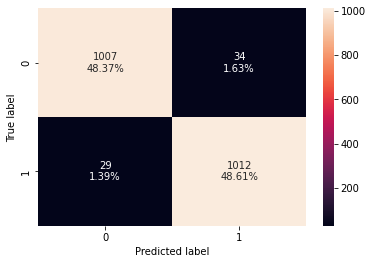

In [731]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned, X_train_un, y_train_un
)
print("Training performance:")
print(Adaboost_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned, X_train_un, y_train_un)

In [732]:
# Calculating different metrics on the test set
adb_tuned_grid_test = model_performance_classification_sklearn(adb_tuned, X_test, y_test)
print("Test performance:")
adb_tuned_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.935341,0.956923,0.726636,0.826029


### Gradient Boost HyperParameter Tuning

In [733]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbc_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gbc_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(gbc_tuned.best_params_,gbc_tuned.best_score_))

C:\Users\atifh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters are {'subsample': 0.9, 'n_estimators': 200, 'max_features': 0.8} with CV score=0.9510075450864924:
CPU times: total: 1.64 s
Wall time: 53.2 s


In [734]:
gbc_tuned=GradientBoostingClassifier(random_state=1,
                                    n_estimators=50,
                                    subsample=0.9,
                                    max_features=0.7)

# Fit the model on training data
gbc_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_features=0.7, n_estimators=50, random_state=1,
                           subsample=0.9)

Training performance:
   Accuracy    Recall  Precision       F1
0   0.95245  0.959654   0.946023  0.95279
*************************************


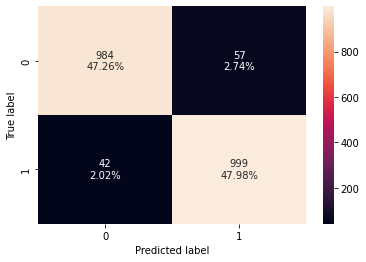

In [735]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    gbc_tuned, X_train_un, y_train_un
)
print("Training performance:")
print(xgboost_random_train)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_train_un, y_train_un)

In [736]:
# Calculating different metrics on the test set
gbc_tuned_grid_test = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Test performance:")
gbc_tuned_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.908687,0.947692,0.647059,0.769039


### XGBoost HyperParameter Tuning

In [737]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.1, 'gamma': 1} with CV score=1.0:
CPU times: total: 1.36 s
Wall time: 20.7 s


In [738]:
# building model with best parameters
xgb_tuned = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=1,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=1, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=10, ...)

Training performance:
   Accuracy  Recall  Precision        F1
0  0.629683     1.0   0.574503  0.729758
*************************************


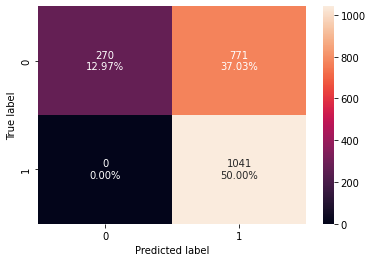

In [739]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned, X_train_un, y_train_un
)
print("Training performance:")
print(xgboost_random_train)

print("*************************************")


# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_train_un, y_train_un)

In [740]:
# Calculating different metrics on the test set
xgb_tuned_grid_test = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Test performance:")
xgb_tuned_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.346496,1.0,0.197089,0.329281


In [741]:
# defining list of models
models = [adb_tuned,gbc_tuned,xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [742]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost Classifer Tuned-UNDER', 'Gradient Boosting Classifier Tuned-UNDER',
                                         'XGBoost Classifier Tuned-UNDER'
                                         ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost Classifer Tuned-UNDER,0.94,0.94,0.97,0.96,0.74,0.73
1,Gradient Boosting Classifier Tuned-UNDER,0.92,0.91,0.96,0.95,0.68,0.65
2,XGBoost Classifier Tuned-UNDER,0.35,0.35,1.00,1.00,0.20,0.20


#### Model Selection

- As we can see the tuned models give better performance compared to the ones without tuned.
- XGBoost model is giving the best Recall score of 100% but at the cost of very low accuracy. 
- Therefore, we will go with AdaBoost because it has a very good Recall score of 96% with test data and also pretty good score with accuracy and precision.

## Pipelining

In [763]:
# creating a list of numerical variables

numerical_features= ['Customer_Age', 'Dependent_count',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit_log', 'Total_Revolving_Bal',
       'Total_Trans_Amt_log', 'Total_Trans_Ct' ]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
                       'Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [764]:
data1 = data.copy()

In [765]:
X = data1.drop(["Attrition_Flag"], axis=1)
Y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [766]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Total_Trans_Amt_log
0,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,42,1.625,0.061,9.448727,7.043160
1,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,864,1.541,33,3.714,0.105,9.018817,7.163947
2,51,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,0,2.594,20,2.333,0.000,8.137103,7.543273
3,40,F,4,High School,NaN,Less than $40K,Blue,3,4,1,2517,1.405,20,2.333,0.760,8.105911,7.066467
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,0,2.175,28,2.500,0.000,8.458928,6.705639


In [767]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(8101, 17) (2026, 17)


In [768]:
# Discretize variable into 3 equal-sized buckets based on quantiles
bins_transform = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")

cols_target = ['Avg_Utilization_Ratio']

for col in cols_target:
    # Fit and transform the train data
    X_train[col] = bins_transform.fit_transform(
        np.array(X_train[col]).reshape(-1, 1)
        )  ## Converting it to numpy array and reshaping because the method expects a 2D array.

    # Transform the test data
    X_test[col] = bins_transform.transform(
        np.array(X_test[col]).reshape(-1, 1)
    )

In [769]:
## Adding labels to the city and map it to the train, val and test set
labels = {0: "Low", 1: "Medium", 2: "High"}

for col in cols_target:
    X_train[col] = X_train[col].map(labels)
    X_test[col] = X_test[col].map(labels)

In [770]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_log,Total_Trans_Amt_log
3105,53,F,2,NaN,Single,$40K - $60K,Blue,5,3,4,0,0.740,69,0.816,Low,8.893298,8.121183
3721,44,F,4,NaN,Married,NaN,Blue,4,3,3,0,0.689,73,0.921,Low,8.670258,8.231376
3389,50,F,3,Uneducated,Single,Less than $40K,Blue,4,2,2,1860,0.680,83,0.804,High,7.849324,8.236156
3552,50,M,1,Graduate,Married,$80K - $120K,Blue,6,2,3,1776,0.460,53,0.472,Medium,9.187276,7.929846
398,55,M,0,High School,Married,$120K +,Blue,5,3,3,2233,1.095,27,0.929,High,8.244334,7.463937


In [771]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBC",
           AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.2,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit_log',
                                                   'Total_Revolving_Bal',
                                                   'Total_Trans_Amt_log',
                                                   'Total_Trans_Ct']),
                                                 ('cat',
                                                  Pi...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])])),
                ('GBC',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=90,
                                    random_state=1))])

In [772]:
# transforming and predicting on test data
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### Business Insights and Recommendations

- As we saw from our analysis, the customers holding less number of products with the Bank have higher chance of attrition. So the Bank management can launch a campaign to advertise and promote their products with the existing/new customers to make them have more products with the Bank.
- As we noticed, the customers with lower credit usage and less transitions happening recently have a higher chance to churn. So the Bank should target such customers by offering credit limit increase or lowering interest rates for some period of time.
- The customers with less age or the ones which are relatively new have a higher chance of leaving the service. It could be due to reasons like using another service etc. So the Bank can do active interaction with such customers and give them incentives like giving away gift points.
- Similary customer with less than 40k income or higher than 120k might have a more chance to leave the service. Such customers can be targeted and incentivzed.
- The customers holding Blue and Gold card have a higher attrition rate. Bank management can bring in some new improvements in these categories to make them more attractive to the customers. For example; giving away some extra perks.